In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

In [3]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280377 entries, 0 to 4280376
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  APPLY_CONTRACT_TIME    object 
 15  APPROVE_CONTRACT_TIME  object 
 16  SIGN_CONTRACT_TIME     object 
 17  APPLY_EMPLOYEE         int64  
 18  SIGN_EMPLOYEE          int64  
 19  FIRST_DUE              int64  
 20  SECOND_DUE             int64  
 21  THIRD_DUE              int64  
 22  FOURTH_DUE        

In [4]:
contract_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,APPLY_CONTRACT_TIME,APPROVE_CONTRACT_TIME,SIGN_CONTRACT_TIME,APPLY_EMPLOYEE,SIGN_EMPLOYEE,FIRST_DUE,SECOND_DUE,THIRD_DUE,FOURTH_DUE,FLAG_INS
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,2020-01-21 11:05:16,NaN,NaN,-1,-1,0,0,0,0,0
1,199467152,62216381,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2020-01-23 21:16:52,2020-01-23 21:19:41,2020-01-23 21:31:32,-1,-1,0,0,0,0,1
2,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2020-03-06 21:25:19,2020-03-06 21:28:01,2020-03-06 21:30:53,23074,23074,0,0,0,0,1
3,203031337,38026388,Elementary (primary) school,0,7000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,2020-03-10 19:33:37,2020-03-10 19:36:53,2020-03-10 19:37:27,-1,-1,0,0,0,0,1
4,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,2019-01-31 19:09:53,2019-01-31 19:11:02,2019-01-31 21:46:12,20815,31089,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280372,342935768,77354359,High school education,0,15000000.0,0,Employed person,ADMINISTRATIVE,Active,Cash Loan,...,2025-06-04 11:15:56,2025-06-04 11:19:56,2025-06-04 11:25:57,-1,-1,0,0,0,0,0
4280373,342935857,20795524,High school education,0,12000000.0,0,Employed person,WORKER,Active,Credit Card,...,2025-06-04 16:17:23,2025-06-04 16:18:00,2025-06-04 16:18:25,-1,-1,0,0,0,0,1
4280374,342935889,14994675,High school education,0,50000000.0,0,Employed person,OTHER,Active,Cash Loan,...,2025-06-04 13:41:32,2025-06-04 14:20:52,2025-06-04 14:27:19,33883,33883,0,0,0,0,1
4280375,342936178,67269333,High school education,0,20000000.0,0,Self-employed person / business owner,OTHER,Active,Cash Loan,...,2025-06-04 11:43:25,2025-06-04 11:46:40,2025-06-04 11:47:02,-1,-1,0,0,0,0,0


In [5]:
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
customer_df

,SKP_CLIENT,NAME_GENDER,NAME_EDUCATION_TYPE,DATE_BIRTH,CNT_CHILDREN,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,676,Female,High school education,1966-03-18,0.0,XNA,-1.0,0.0,59,Long An
1,1470,Male,High school education,1967-12-27,1.0,XNA,-1.0,0.0,57,TP Ho Chi Minh
2,7123,Male,Junior school education,1972-10-03,2.0,XNA,6.0,0.0,52,Dak Lak
3,10711,Female,Elementary (primary) school,1978-01-01,1.0,XNA,1.0,0.0,47,Tien Giang
4,12407,Male,High school education,1986-03-14,1.0,XNA,-1.0,0.0,39,Gia Lai
...,...,...,...,...,...,...,...,...,...,...
1000523,126809534,Male,XNA,1990-04-02,0.0,XNA,-1.0,0.0,35,0
1000524,127462754,Male,XNA,2005-04-30,-1.0,XNA,-1.0,0.0,20,0
1000525,126394510,Male,XNA,1995-07-24,0.0,XNA,-1.0,0.0,29,0
1000526,118415150,Female,XNA,2000-05-09,-1.0,XNA,-1.0,0.0,25,0


In [6]:
shop_df = pd.read_csv(r'cleaned_data/SHOP.csv')
shop_df

,CODE_POS,SALESROOM_PROVINCE
0,410163,Hai Phong
1,400714,Nghe An
2,240068,Binh Phuoc
3,170525,Kien Giang
4,540196,Lao Cai
...,...,...
64338,121362,An Giang
64339,121361,An Giang
64340,300501,Bac Lieu
64341,15026,TP Ho Chi Minh


In [7]:
employee_df = pd.read_csv(r'cleaned_data/EMPLOYEE.csv')
employee_df

,CODE_EMPLOYEE,HIRING_DATE,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,46911,2021-01-04,2021-10-01,115169,Female,2001-11-28,XNA,270,19,23,Ninh Thuan,False
1,46945,2021-01-11,2021-07-26,35377,Female,1999-12-23,XNA,196,21,25,Dong Nai,False
2,47297,2021-02-22,2024-03-13,115717,Female,1999-06-10,JUNIOR,1115,21,26,TP Ho Chi Minh,False
3,47428,2021-03-01,2021-04-11,2101,Female,1998-10-10,XNA,41,22,26,Binh Thuan,False
4,47435,2021-03-01,2021-11-11,115642,Female,1988-02-18,XNA,255,33,37,TP Ho Chi Minh,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11378,118286,2013-07-24,2021-09-19,120745,Female,1992-11-05,XNA,2979,20,32,Thai Binh,False
11379,120002,2013-10-14,2022-06-01,17466,Female,1992-05-01,XNA,3152,21,33,Dong Thap,False
11380,120825,2013-11-27,2021-08-15,23979,Female,1991-03-26,XNA,2818,22,34,TP Ho Chi Minh,False
11381,121209,2013-12-16,NaN,16010,Male,1988-03-11,JUNIOR,4195,25,37,Dong Thap,False


In [8]:
leads_df = pd.read_csv(r'cleaned_data/LEADS.csv')
leads_df

,DTIME_CREATED,DATE_ASSIGNED,DATE_ACCEPTED,DESC_FIN_REASON,CODE_POS,CODE_PRODUCT_TYPE,FLAG_ASSIGNED,CODE_SA,SKP_CLIENT,MAX_OFFER,LEAD_SOURCE,PROCESS
0,2019-10-16 13:38:42,2200-01-01 00:00:00,2200-01-01 00:00:00,Not Applicable,11417,Cash Loan,0,-1,12393659,20000000.0,TLS,PRO
1,2024-09-26 18:22:11,2024-09-26 18:22:11,2024-09-26 18:22:21,Not Interest,440055,GM Paylater,1,26865,93813570,8000000.0,RTDM,STD
2,2024-11-06 20:08:00,2024-11-07 08:33:46,2024-11-07 08:34:32,Not Interest,1W0499,Credit Card,1,58616,1748865,25000000.0,RTDM,STD
3,2022-09-29 11:56:46,2022-09-29 11:56:46,2022-09-29 18:48:50,Not Interest,400554,Credit Card,1,27520,22148819,5000000.0,RTDM,STD
4,2022-03-30 20:17:34,2022-03-30 20:17:34,2022-03-31 08:48:42,Not Interest,100284,Cash Loan,1,23262,54145376,40000000.0,RTDM,STD
...,...,...,...,...,...,...,...,...,...,...,...,...
2143886,2022-11-04 19:28:06,2022-11-04 19:28:06,2022-11-06 12:33:10,Not Interest,30298,Cash Loan,1,31265,57165785,72657000.0,RTDM,STD
2143887,2022-11-11 19:50:40,2022-11-11 19:50:40,2022-11-12 08:09:48,Not Interest,221486,Credit Card,1,27690,42788141,3000000.0,RTDM,STD
2143888,2025-03-19 14:38:46,2025-03-20 08:00:50,2025-03-20 08:03:59,Not Interest,13355,Credit Card,1,47460,104196078,35000000.0,RTDM,STD
2143889,2022-11-11 16:12:23,2022-11-11 16:12:23,2022-11-11 16:12:48,Expire Lifetime,170508,Credit Card,1,23679,12577773,5500000.0,RTDM,STD


In [9]:
leads_df = leads_df.merge(employee_df, how='left', left_on='CODE_SA', right_on='CODE_EMPLOYEE')
leads_df = leads_df.merge(shop_df, how='left', on='CODE_POS')
leads_df['DTIME_CREATED'] = pd.to_datetime(leads_df['DTIME_CREATED'], format='mixed')
leads_df['DATE_ASSIGNED'] = pd.to_datetime(leads_df['DATE_ASSIGNED'], format='mixed')
leads_df['DATE_ACCEPTED'] = pd.to_datetime(leads_df['DATE_ACCEPTED'], format='mixed')
leads_df

,DTIME_CREATED,DATE_ASSIGNED,DATE_ACCEPTED,DESC_FIN_REASON,CODE_POS,CODE_PRODUCT_TYPE,FLAG_ASSIGNED,CODE_SA,SKP_CLIENT,MAX_OFFER,...,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,SALESROOM_PROVINCE
0,2019-10-16 13:38:42,2200-01-01 00:00:00,2200-01-01 00:00:00,Not Applicable,11417,Cash Loan,0,-1,12393659,20000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TP Ho Chi Minh
1,2024-09-26 18:22:11,2024-09-26 18:22:11,2024-09-26 18:22:21,Not Interest,440055,GM Paylater,1,26865,93813570,8000000.0,...,1624.0,Female,1986-03-03,WARRIOR,3305.0,30.0,39.0,Thanh Hoa,False,Thanh Hoa
2,2024-11-06 20:08:00,2024-11-07 08:33:46,2024-11-07 08:34:32,Not Interest,1W0499,Credit Card,1,58616,1748865,25000000.0,...,889.0,Male,2001-11-12,SENIOR,303.0,22.0,23.0,TP Ho Chi Minh,False,TP Ho Chi Minh
3,2022-09-29 11:56:46,2022-09-29 11:56:46,2022-09-29 18:48:50,Not Interest,400554,Credit Card,1,27520,22148819,5000000.0,...,13445.0,Female,1990-01-01,SENIOR,3274.0,26.0,35.0,Nghe An,False,Nghe An
4,2022-03-30 20:17:34,2022-03-30 20:17:34,2022-03-31 08:48:42,Not Interest,100284,Cash Loan,1,23262,54145376,40000000.0,...,116223.0,Male,1993-02-11,SENIOR,3169.0,22.0,32.0,Thua Thien - Hue,True,Thua Thien - Hue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143886,2022-11-04 19:28:06,2022-11-04 19:28:06,2022-11-06 12:33:10,Not Interest,30298,Cash Loan,1,31265,57165785,72657000.0,...,111224.0,Female,1995-02-25,MASTER,3088.0,21.0,30.0,Can Tho,False,Can Tho
2143887,2022-11-11 19:50:40,2022-11-11 19:50:40,2022-11-12 08:09:48,Not Interest,221486,Credit Card,1,27690,42788141,3000000.0,...,118766.0,Female,1989-02-24,MASTER,3263.0,27.0,36.0,Ha Noi,False,Ha Noi
2143888,2025-03-19 14:38:46,2025-03-20 08:00:50,2025-03-20 08:03:59,Not Interest,13355,Credit Card,1,47460,104196078,35000000.0,...,40659.0,Female,1996-08-06,SENIOR,1563.0,24.0,28.0,TP Ho Chi Minh,False,TP Ho Chi Minh
2143889,2022-11-11 16:12:23,2022-11-11 16:12:23,2022-11-11 16:12:48,Expire Lifetime,170508,Credit Card,1,23679,12577773,5500000.0,...,626.0,Male,1990-04-24,SENIOR,2602.0,25.0,35.0,Kien Giang,False,Kien Giang


In [10]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE_x,CNT_CHILDREN_x,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,FLAG_INS,NAME_GENDER,NAME_EDUCATION_TYPE_y,DATE_BIRTH,CNT_CHILDREN_y,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,0,Male,Elementary (primary) school,1980-08-03,0.0,Irregular salary frequency,-1.0,0.00,44,TP Ho Chi Minh
1,199467152,62216381,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,1,Male,Master's degree,1973-05-26,2.0,XNA,-1.0,0.00,52,Khanh Hoa
2,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,1,Female,Bachelor's degree,1992-07-11,1.0,XNA,-1.0,0.00,32,Phu Tho
3,203031337,38026388,Elementary (primary) school,0,7000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,1,Female,Elementary (primary) school,1975-02-11,2.0,XNA,-1.0,0.00,50,TP Ho Chi Minh
4,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,1,Female,High school education,1991-08-21,2.0,XNA,-1.0,0.00,33,Khanh Hoa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280372,342935768,77354359,High school education,0,15000000.0,0,Employed person,ADMINISTRATIVE,Active,Cash Loan,...,0,Male,Master's degree,1972-03-26,2.0,XNA,-1.0,0.00,53,Khanh Hoa
4280373,342935857,20795524,High school education,0,12000000.0,0,Employed person,WORKER,Active,Credit Card,...,1,Male,High school education,1993-10-03,0.0,XNA,-1.0,0.00,31,Thanh Hoa
4280374,342935889,14994675,High school education,0,50000000.0,0,Employed person,OTHER,Active,Cash Loan,...,1,Male,High school education,1976-01-01,0.0,XNA,-1.0,0.00,49,TP Ho Chi Minh
4280375,342936178,67269333,High school education,0,20000000.0,0,Self-employed person / business owner,OTHER,Active,Cash Loan,...,0,Male,Bachelor's degree,1993-08-22,0.0,XNA,-1.0,0.00,31,TP Ho Chi Minh


In [11]:
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE_x,CNT_CHILDREN_x,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2023-11-29,26872,Female,1985-03-24,SENIOR,2969,30,40,Phu Tho,False
1,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,2022-11-30,19780,Female,1992-08-03,MASTER,2800,22,32,Khanh Hoa,True
2,335925533,126826775,XNA,0,2000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,NaN,889,Female,1989-11-15,MASTER,2633,28,35,TP Ho Chi Minh,False
3,163357328,38084937,Junior school education,0,5000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,2021-01-01,34590,Female,1994-06-30,XNA,1473,22,30,Thanh Hoa,False
4,193688464,37761042,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2021-04-13,1406,Female,1992-07-10,XNA,1624,24,32,Hung Yen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,99124783,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Signed,Cash Loan,...,NaN,114569,Female,1988-06-01,WARRIOR,1458,33,37,Long An,False
900897,342934791,6409762,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Signed,Cash Loan,...,NaN,109522,Male,2002-02-23,WARRIOR,1311,19,23,Bac Lieu,False
900898,342935412,37676700,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Signed,Two-wheelers,...,NaN,1428,Male,2000-08-17,JUNIOR,261,24,24,TP Ho Chi Minh,False
900899,342935765,7514929,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Approved,Cash Loan,...,NaN,248,Male,1991-04-22,SENIOR,268,33,34,Long An,False


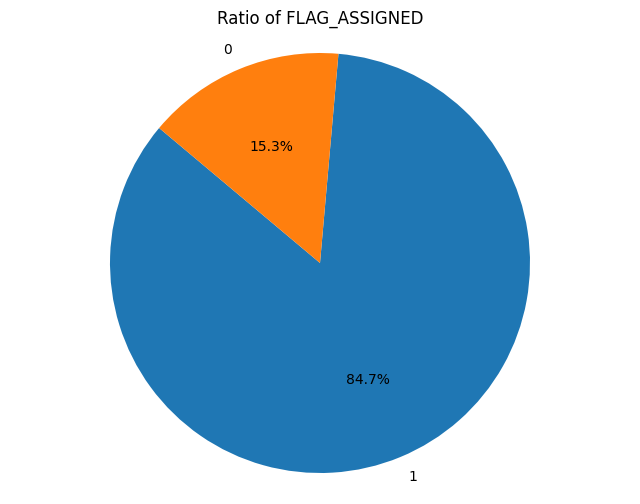

In [12]:
# Pie chart for ratio of FLAG_ASSIGNED
plt.figure(figsize=(8, 6))
flag_counts = leads_df['FLAG_ASSIGNED'].value_counts()
plt.pie(flag_counts, labels=flag_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of FLAG_ASSIGNED')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

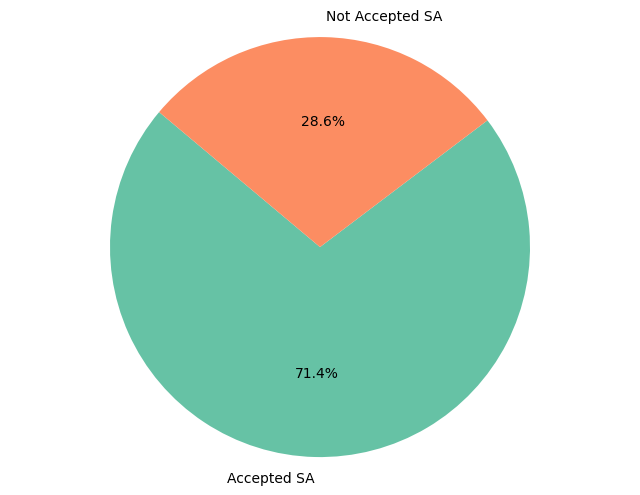

In [13]:
# Pie chart for ratio of CODE_SA -1 in leads_df
assign_SA_status = leads_df['CODE_SA'].apply(lambda x: 'Accepted SA' if x != -1 else 'Not Accepted SA')
counts = assign_SA_status.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
# plt.title('Ratio of Assigned vs Not Assigned SA')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

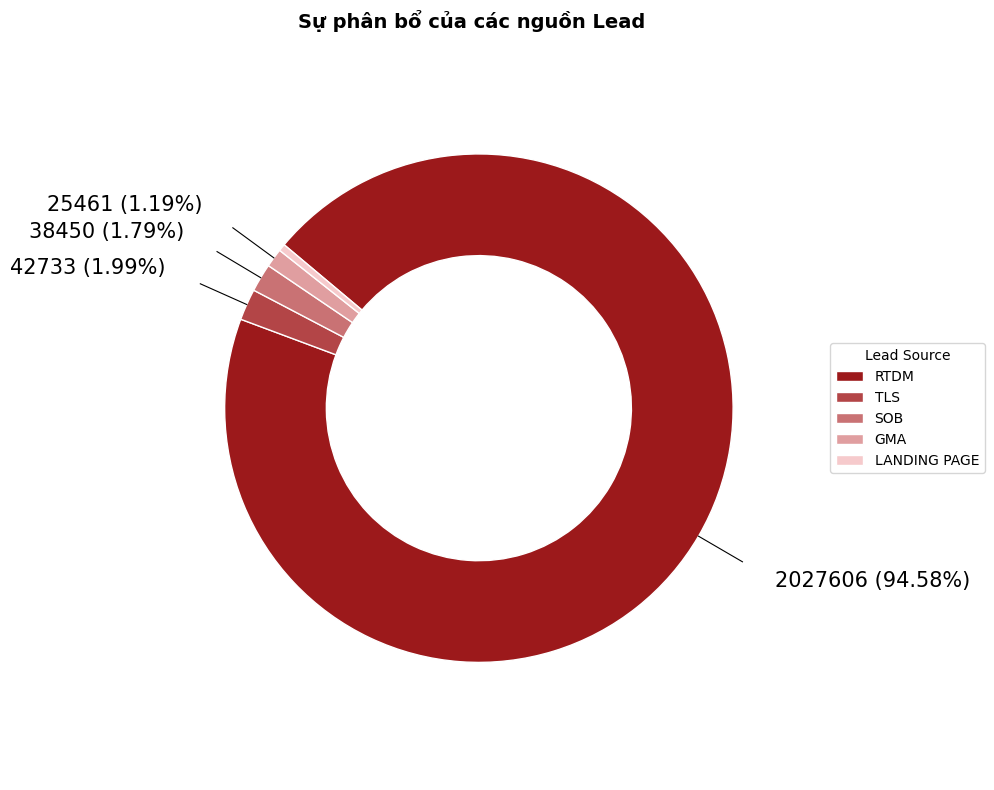

In [14]:
# Đếm số lượng theo LEAD_SOURCE
lead_source_counts = leads_df['LEAD_SOURCE'].value_counts()
labels = lead_source_counts.index
sizes = lead_source_counts.values
total = sizes.sum()

# Tạo màu theo template đỏ
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(sizes))
)

# Tạo nhãn dạng "xxx KH (yy.yy%)"
labels_with_values = [
    f'{count} ({count / total * 100:.2f}%)' if count / total * 100 >= 0.5 else ''
    for count in sizes
]

# Vẽ donut chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, _ = ax.pie(
    sizes,
    startangle=140,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài bằng đường chỉ
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_label, y_label, label, ha=ha, va='center', fontsize=15)

# Legend ngoài
ax.legend(
    wedges,
    labels,
    title="Lead Source",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Tiêu đề và căn chỉnh
ax.set_title('Sự phân bổ của các nguồn Lead', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.tight_layout()
plt.show()

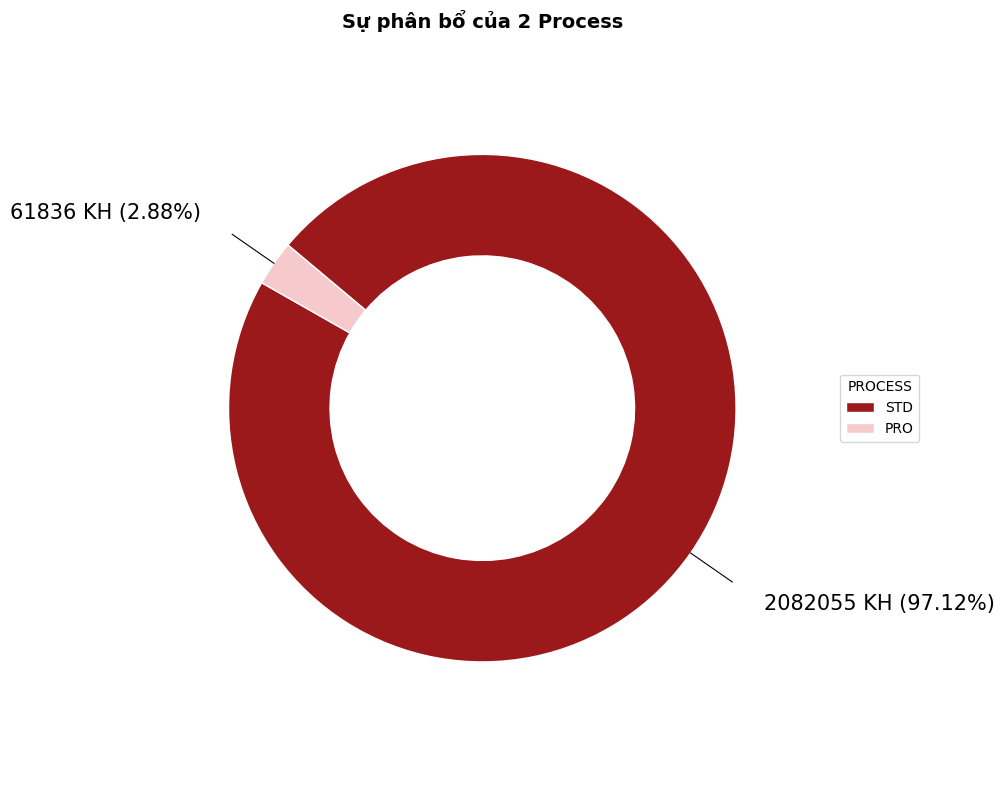

In [15]:
# Đếm số lượng theo PROCESS
process_counts = leads_df['PROCESS'].value_counts()
labels = process_counts.index
sizes = process_counts.values
total = sizes.sum()

# Tạo màu template đỏ
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(sizes))
)

# Tạo nhãn dạng "xxx KH (yy.yy%)"
labels_with_values = [
    f'{count} KH ({count / total * 100:.2f}%)' if count / total * 100 >= 0.5 else ''
    for count in sizes
]

# Vẽ donut chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, _ = ax.pie(
    sizes,
    startangle=140,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài bằng đường chỉ
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_label, y_label, label, ha=ha, va='center', fontsize=15)

# Legend
ax.legend(
    wedges,
    labels,
    title="PROCESS",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Tiêu đề và căn chỉnh
ax.set_title('Sự phân bổ của 2 Process', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.tight_layout()
plt.show()

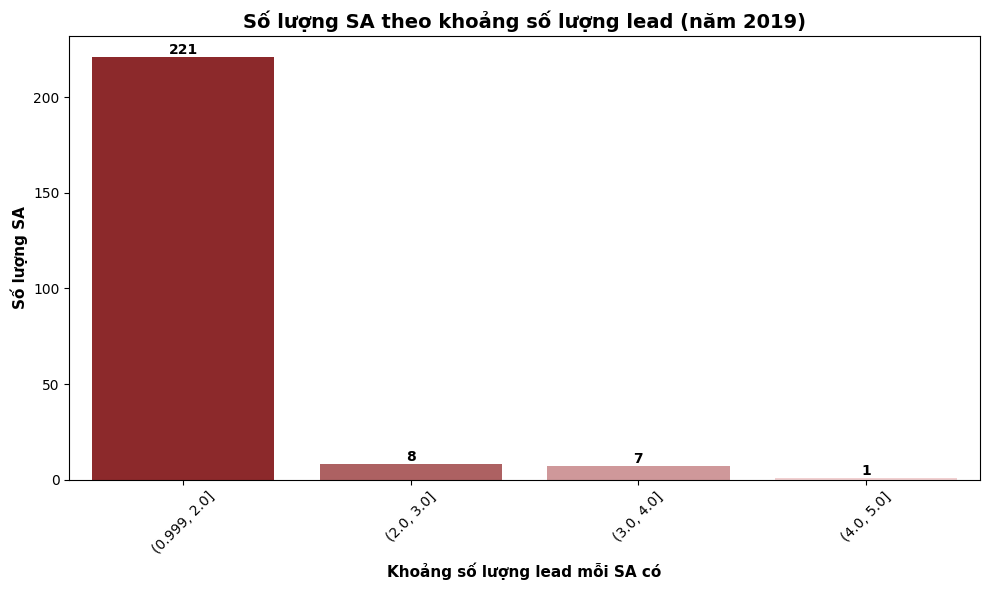

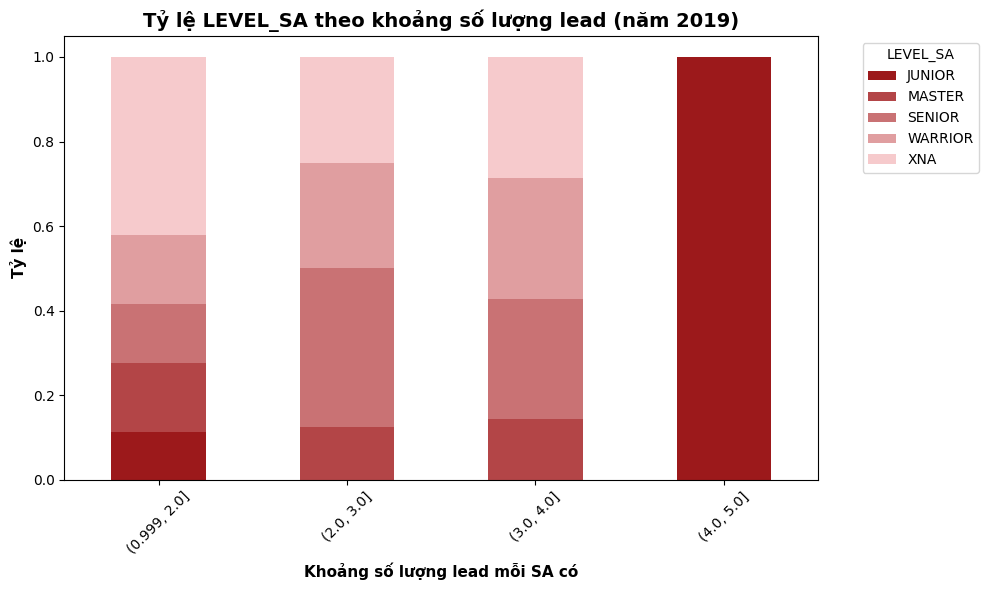

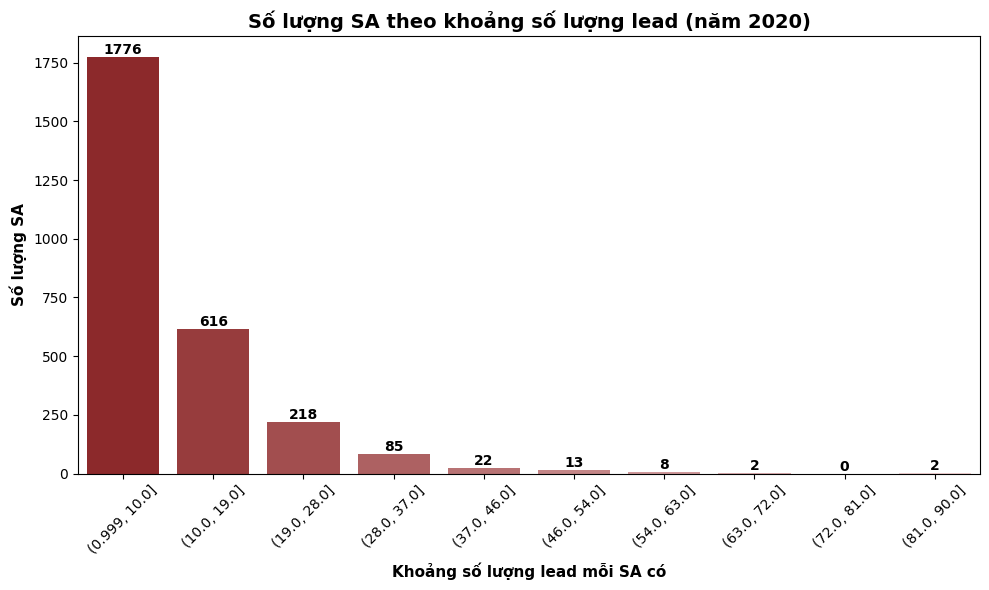

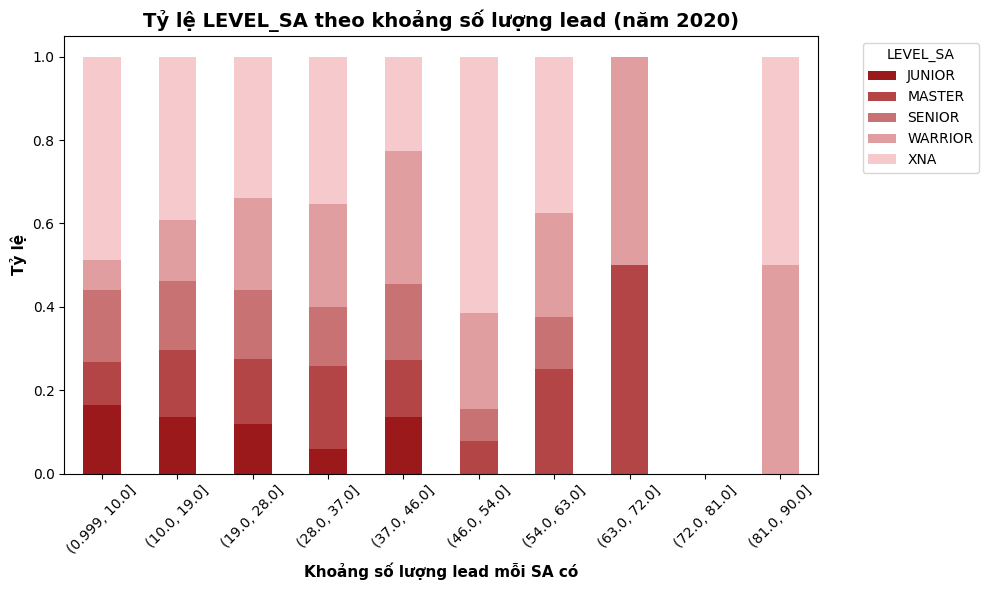

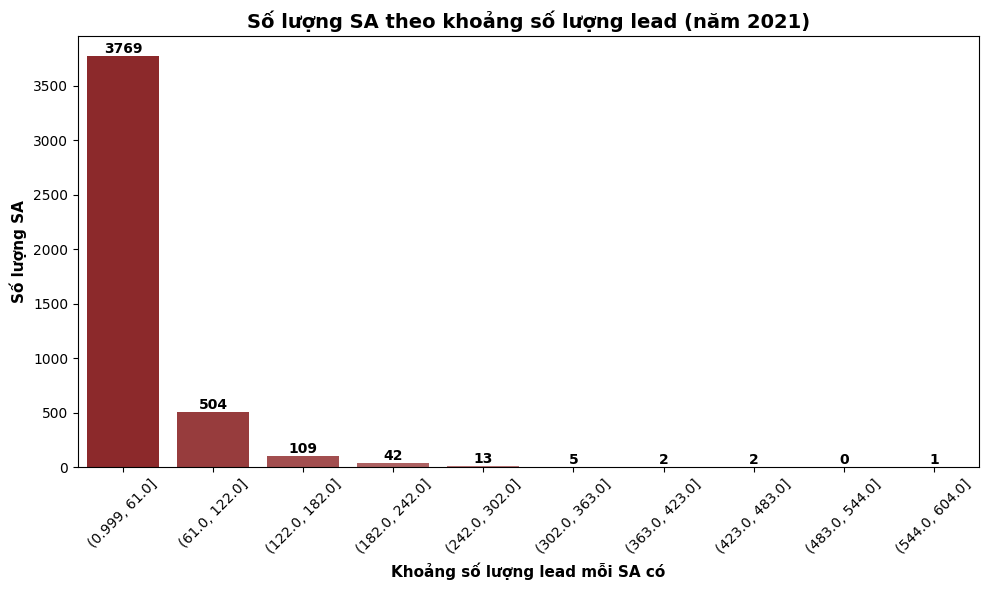

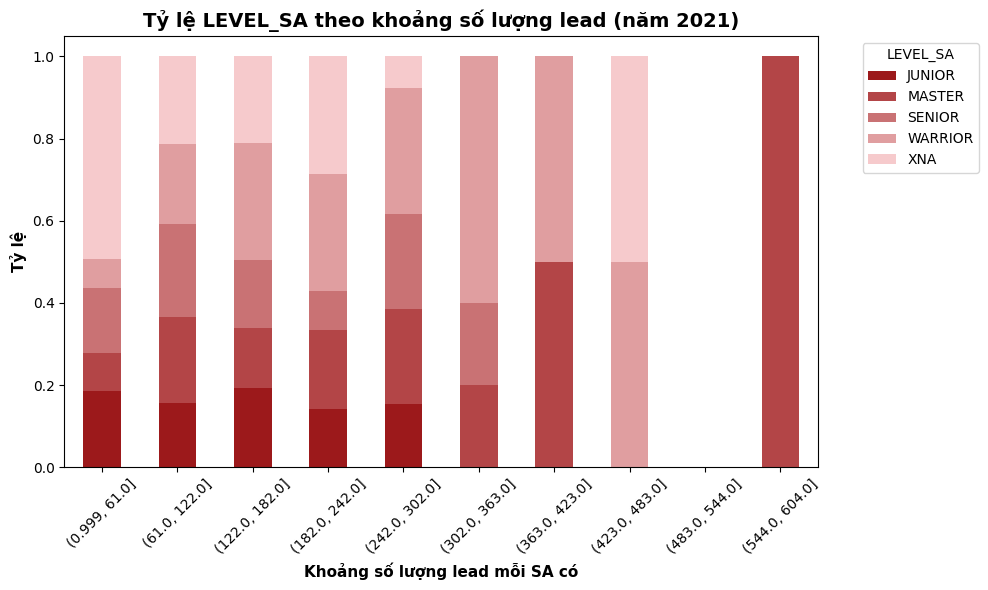

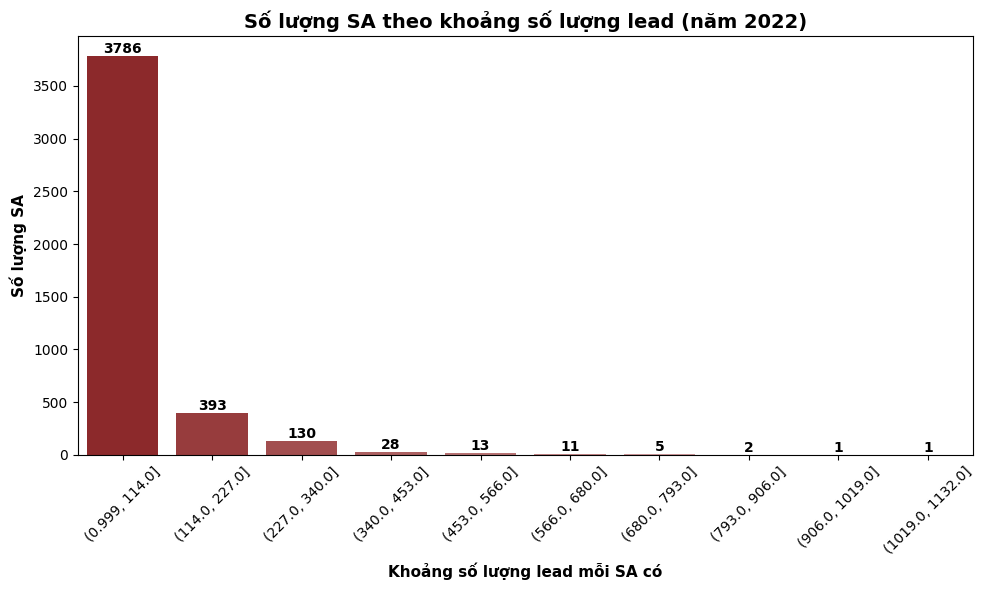

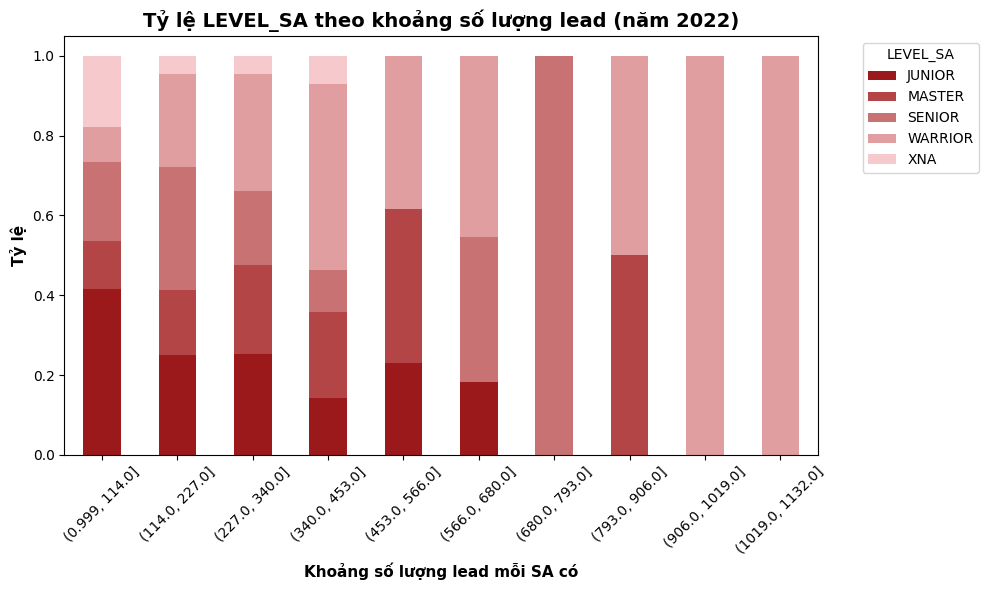

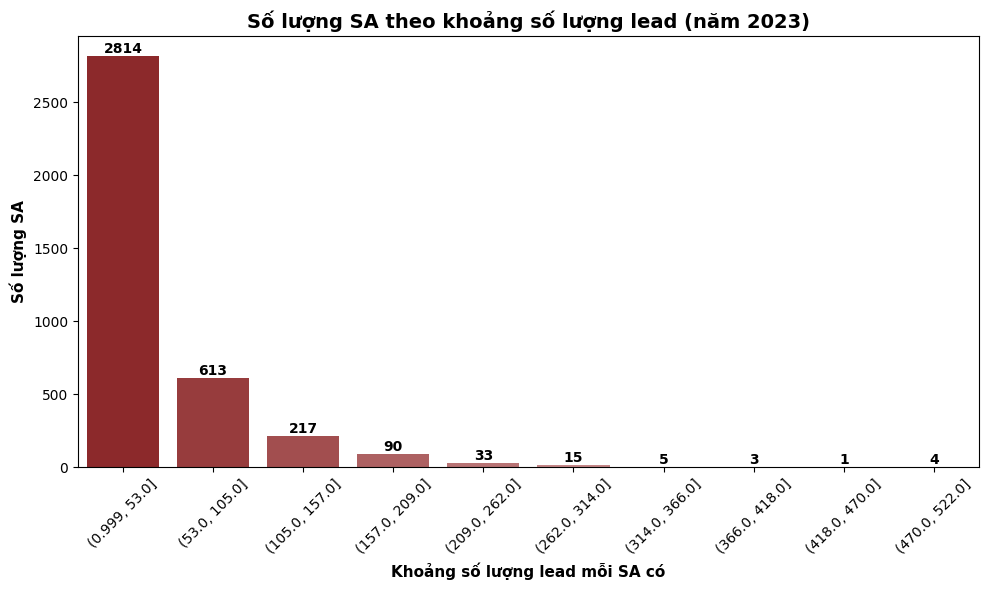

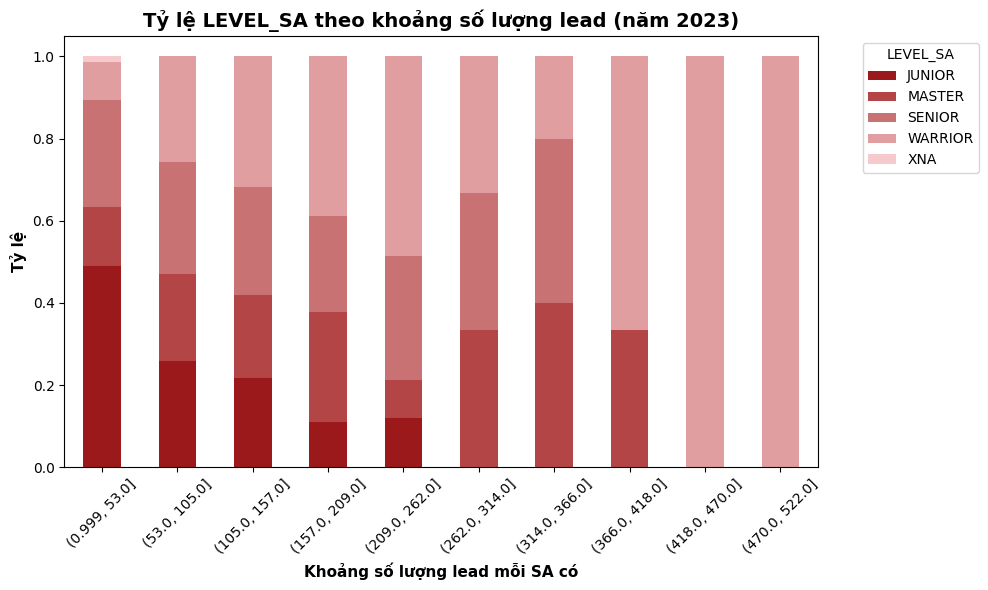

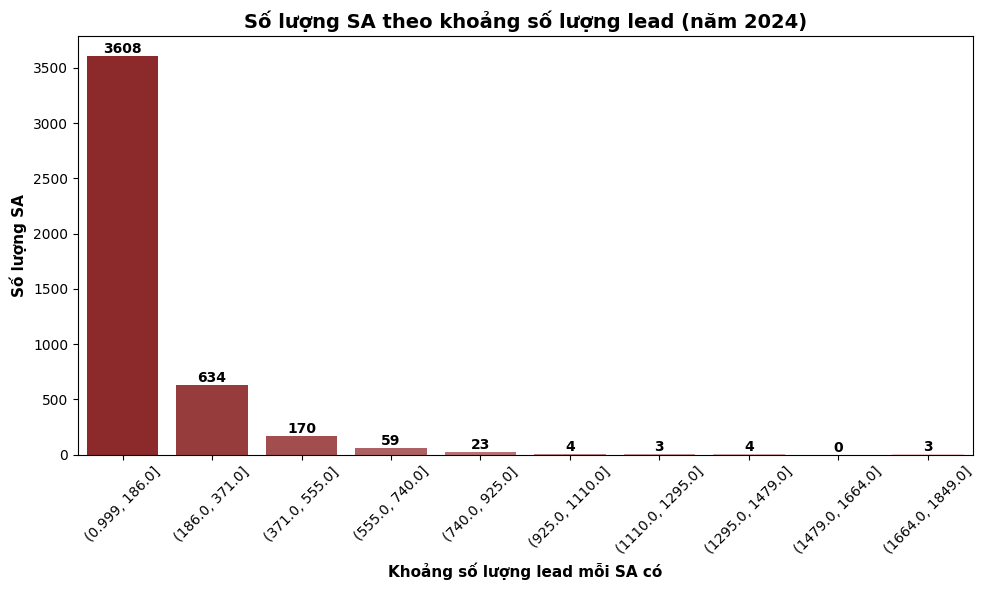

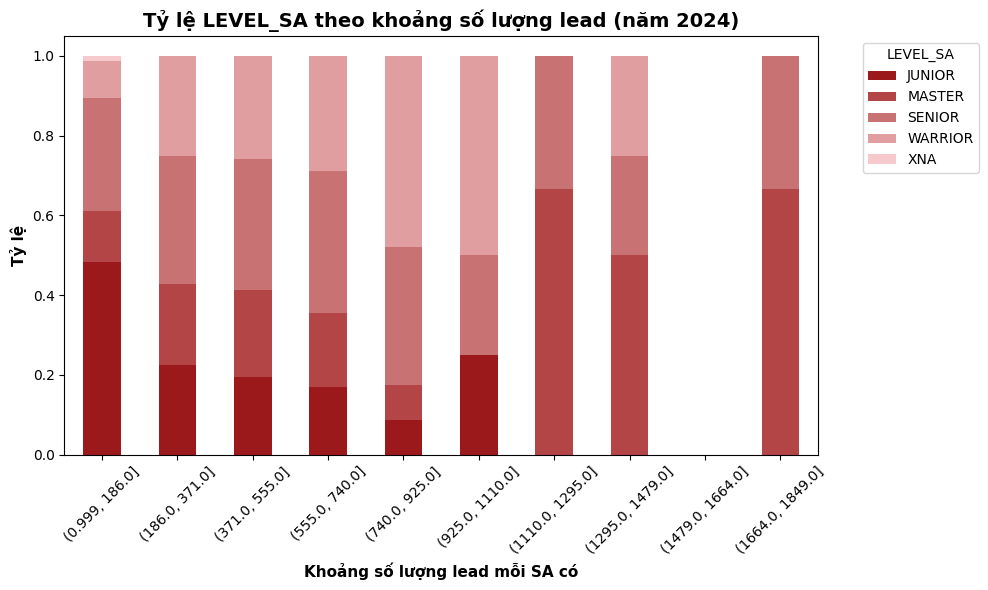

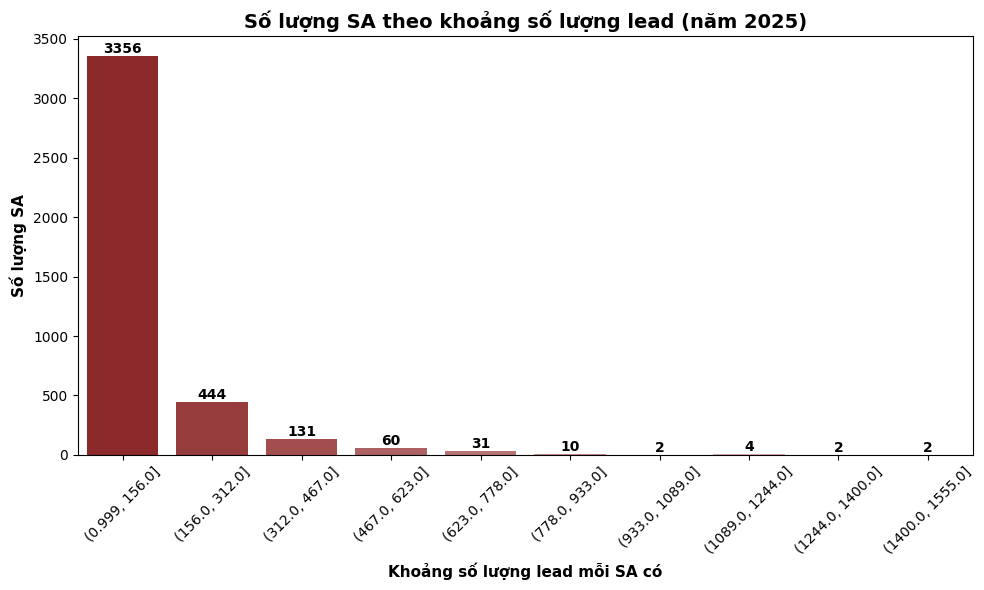

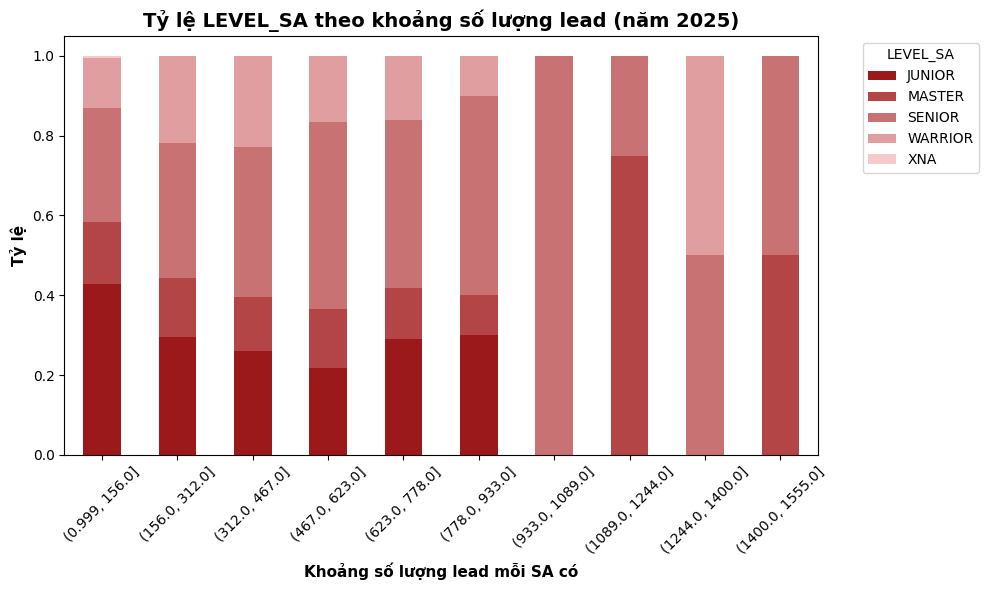

In [16]:
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])

for year in sorted(leads_df['DTIME_CREATED'].dt.year.unique()):
    valid_sa_year = leads_df[(leads_df['CODE_SA'] != -1) & (leads_df['DTIME_CREATED'].dt.year == year)]

    # Bước 1
    sa_lead_counts = valid_sa_year['CODE_SA'].value_counts()

    # Bước 2
    sa_lead_df = sa_lead_counts.reset_index()
    sa_lead_df.columns = ['CODE_SA', 'LEAD_COUNT']
    sa_lead_df = sa_lead_df.merge(
        valid_sa_year[['CODE_SA', 'LEVEL_SA']].drop_duplicates(),
        on='CODE_SA',
        how='left'
    )

    # Bước 3
    min_val, max_val = sa_lead_df['LEAD_COUNT'].min(), sa_lead_df['LEAD_COUNT'].max()
    bin_edges = np.linspace(min_val, max_val, num=11)
    bin_edges = np.round(bin_edges).astype(int)
    bin_edges = np.unique(bin_edges)

    sa_lead_df['LEAD_BIN'] = pd.cut(
        sa_lead_df['LEAD_COUNT'],
        bins=bin_edges,
        include_lowest=True
    )

    # Bước 4
    lead_count_distribution = (
        sa_lead_df
        .groupby('LEAD_BIN')['CODE_SA']
        .count()
        .reset_index(name='NUM_SA')
    )

    # Tạo bảng màu theo số lượng bin
    colors = custom_cmap(np.linspace(0, 1, len(lead_count_distribution)))

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(data=lead_count_distribution, x='LEAD_BIN', y='NUM_SA', palette=colors)

    for bar in bars.patches:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    plt.title(f'Số lượng SA theo khoảng số lượng lead (năm {year})', fontsize=14, fontweight='bold')
    plt.xlabel('Khoảng số lượng lead mỗi SA có', fontsize=11, fontweight='bold')
    plt.ylabel('Số lượng SA', fontsize=11, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Bước 5
    level_dist = (
        sa_lead_df
        .groupby(['LEAD_BIN', 'LEVEL_SA'])['CODE_SA']
        .count()
        .reset_index(name='SA_COUNT')
    )

    level_dist['PCT'] = (
        level_dist
        .groupby('LEAD_BIN')['SA_COUNT']
        .transform(lambda x: x / x.sum())
    )

    # Bước 6
    pivot_df = level_dist.pivot(index='LEAD_BIN', columns='LEVEL_SA', values='PCT')
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=custom_cmap)

    plt.title(f'Tỷ lệ LEVEL_SA theo khoảng số lượng lead (năm {year})', fontsize=14, fontweight='bold')
    plt.ylabel('Tỷ lệ', fontsize=11, fontweight='bold')
    plt.xlabel('Khoảng số lượng lead mỗi SA có', fontsize=11, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='LEVEL_SA', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

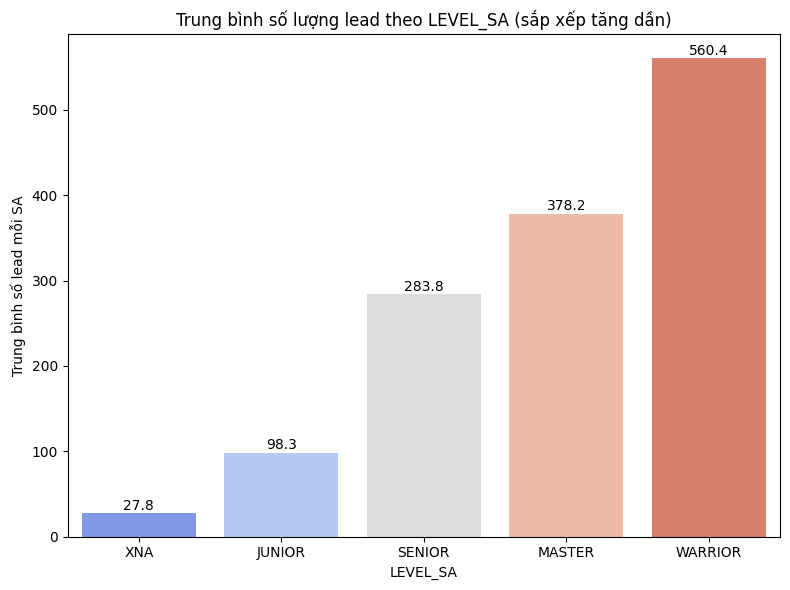

In [17]:
# Bước 1: Lọc ra SA hợp lệ
valid_sa = leads_df[leads_df['CODE_SA'] != -1]

# Bước 2: Tính số lượng lead mỗi SA
sa_lead_counts = (
    valid_sa
    .groupby('CODE_SA')
    .size()
    .reset_index(name='LEAD_COUNT')
)

# Bước 3: Lấy LEVEL_SA của mỗi SA
sa_levels = (
    valid_sa[['CODE_SA', 'LEVEL_SA']]
    .drop_duplicates(subset='CODE_SA')
    .set_index('CODE_SA')
)

# Bước 4: Gộp LEVEL_SA vào bảng lead counts
sa_lead_counts = sa_lead_counts.join(sa_levels, on='CODE_SA')

# Bước 5: Tính trung bình số lượng lead theo LEVEL_SA
avg_leads_by_level = (
    sa_lead_counts
    .groupby('LEVEL_SA')['LEAD_COUNT']
    .mean()
    .reset_index()
    .sort_values('LEAD_COUNT')  # ← Sắp xếp theo trung bình từ thấp đến cao
)

# Bước 6: Vẽ biểu đồ
plt.figure(figsize=(8, 6))
bars = sns.barplot(
    data=avg_leads_by_level,
    x='LEVEL_SA',
    y='LEAD_COUNT',
    order=avg_leads_by_level['LEVEL_SA'],  # giữ thứ tự đúng đã sort
    palette='coolwarm'
)

# Thêm giá trị trên đầu mỗi cột (đúng thứ tự cột hiển thị)
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}',
        ha='center',
        va='bottom'
    )

plt.title("Trung bình số lượng lead theo LEVEL_SA (sắp xếp tăng dần)")
plt.xlabel("LEVEL_SA")
plt.ylabel("Trung bình số lead mỗi SA")
plt.tight_layout()
plt.show()


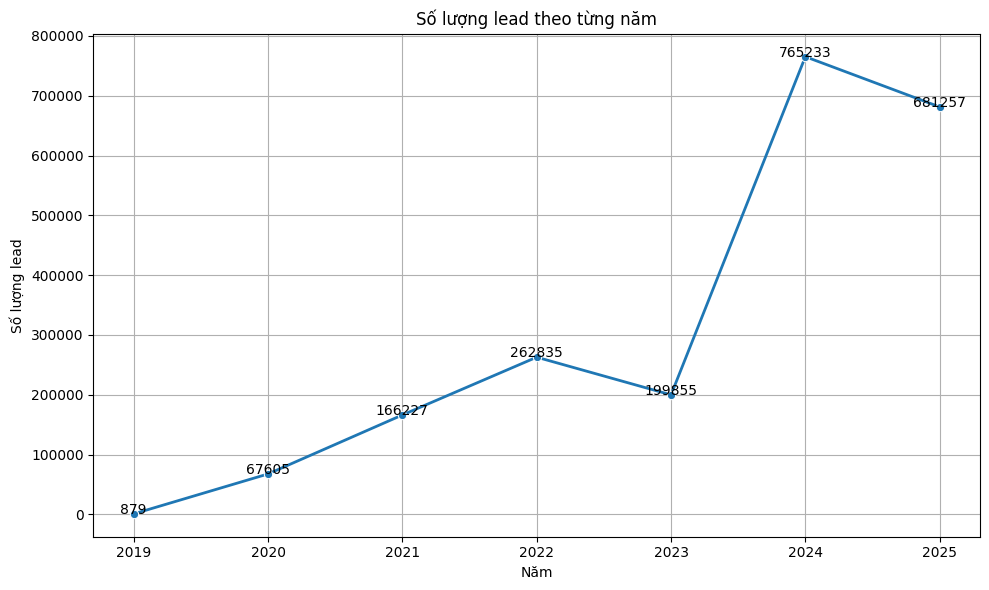

In [18]:
# Tạo cột NĂM
leads_df['YEAR'] = leads_df['DTIME_CREATED'].dt.year

# Đếm số lượng lead theo từng năm
leads_by_year = leads_df.groupby('YEAR').size().reset_index(name='NUM_LEADS')

# Vẽ line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=leads_by_year, x='YEAR', y='NUM_LEADS', marker='o', linewidth=2)

# Gán số lượng lên trên mỗi điểm
for i, row in leads_by_year.iterrows():
    plt.text(row['YEAR'], row['NUM_LEADS'] + 50, f"{row['NUM_LEADS']}", ha='center')

plt.title("Số lượng lead theo từng năm")
plt.xlabel("Năm")
plt.ylabel("Số lượng lead")
plt.xticks(leads_by_year['YEAR'])  # Hiển thị đầy đủ các năm
plt.grid(True)
plt.tight_layout()
plt.show()

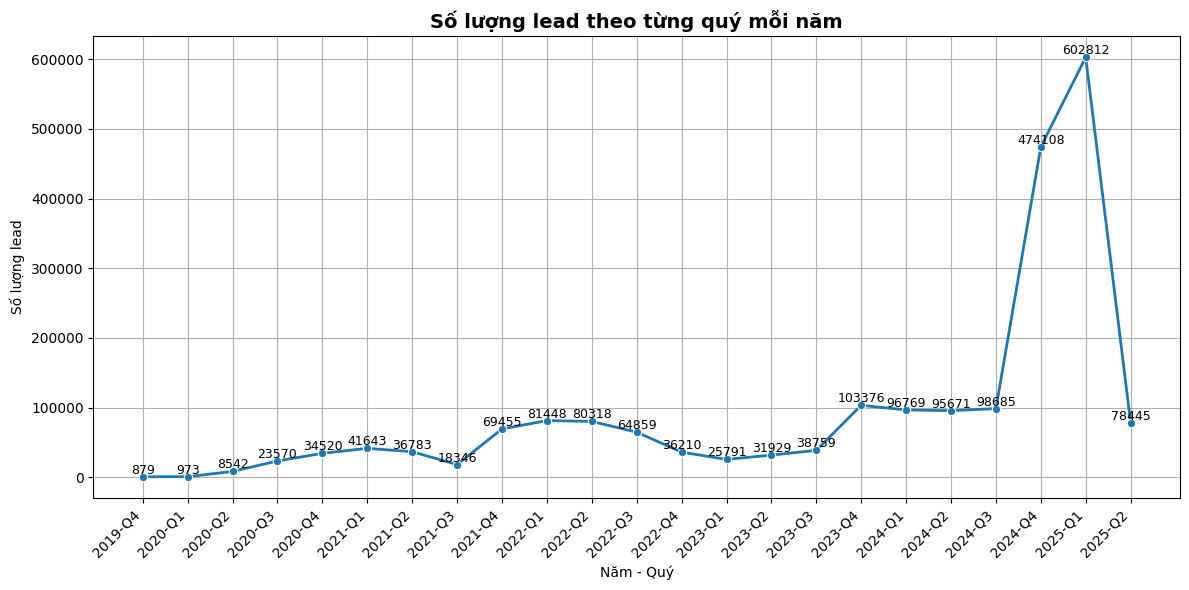

In [29]:
# Tạo cột NĂM và QUÝ
leads_df['YEAR'] = leads_df['DTIME_CREATED'].dt.year
leads_df['QUARTER'] = leads_df['DTIME_CREATED'].dt.quarter
leads_df['YEAR_QUARTER'] = leads_df['YEAR'].astype(str) + '-Q' + leads_df['QUARTER'].astype(str)

# Đếm số lượng lead theo từng quý mỗi năm
leads_by_quarter = (
    leads_df
    .groupby(['YEAR', 'QUARTER', 'YEAR_QUARTER'])
    .size()
    .reset_index(name='NUM_LEADS')
)

# Sắp xếp đúng thứ tự thời gian
leads_by_quarter = leads_by_quarter.sort_values(by=['YEAR', 'QUARTER'])

# Vẽ line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=leads_by_quarter, x='YEAR_QUARTER', y='NUM_LEADS', marker='o', linewidth=2)

# Gán số lượng đúng vị trí
for _, row in leads_by_quarter.iterrows():
    plt.text(row['YEAR_QUARTER'], row['NUM_LEADS'] + 50, f"{row['NUM_LEADS']}", 
             ha='center', va='bottom', fontsize=9)

plt.title("Số lượng lead theo từng quý mỗi năm", fontsize=14, fontweight='bold')
plt.xlabel("Năm - Quý")
plt.ylabel("Số lượng lead")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


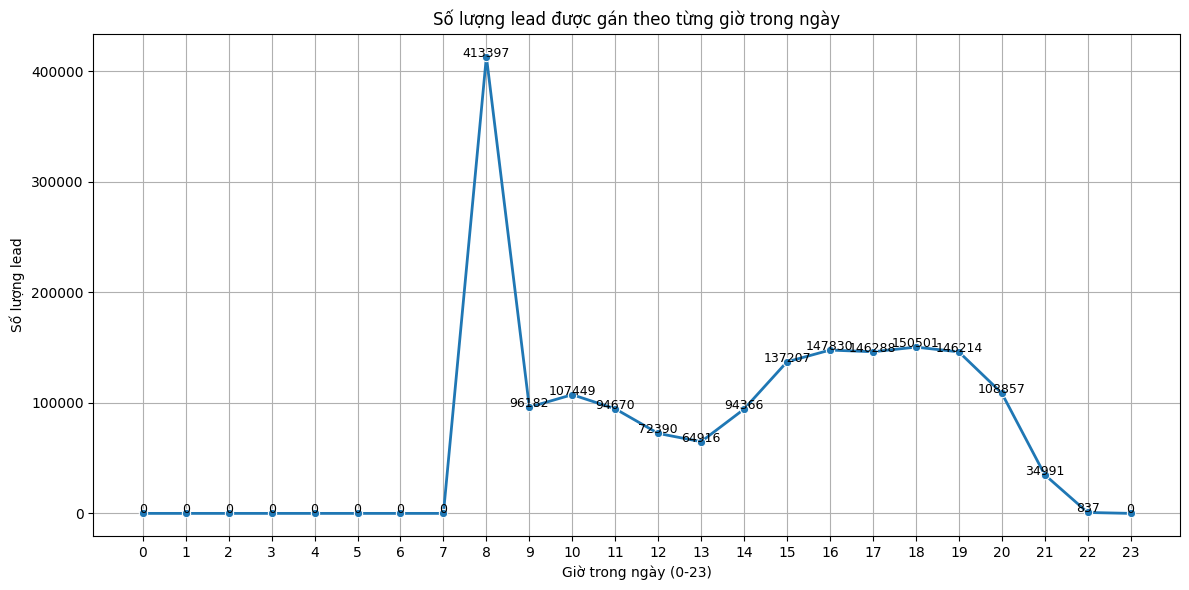

In [20]:
# Đảm bảo datetime đúng
valid_assign_time = leads_df[leads_df['DATE_ASSIGNED'] != '2200-01-01 00:00:00']

# Tạo cột giờ
leads_df['HOUR'] = valid_assign_time['DATE_ASSIGNED'].dt.hour

# Đếm số lượng lead theo từng giờ
leads_by_hour = leads_df.groupby('HOUR').size().reset_index(name='NUM_LEADS')

# Đảm bảo đủ 24 giờ (0–23), kể cả nếu không có dữ liệu
full_hours = pd.DataFrame({'HOUR': np.arange(0, 24)})
leads_by_hour = full_hours.merge(leads_by_hour, on='HOUR', how='left').fillna(0)
leads_by_hour['NUM_LEADS'] = leads_by_hour['NUM_LEADS'].astype(int)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=leads_by_hour, x='HOUR', y='NUM_LEADS', marker='o', linewidth=2)

# Thêm số lên mỗi điểm
for i, row in leads_by_hour.iterrows():
    plt.text(row['HOUR'], row['NUM_LEADS'] + 5, f"{row['NUM_LEADS']}", ha='center', fontsize=9)

plt.title("Số lượng lead được gán theo từng giờ trong ngày")
plt.xlabel("Giờ trong ngày (0-23)")
plt.ylabel("Số lượng lead")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

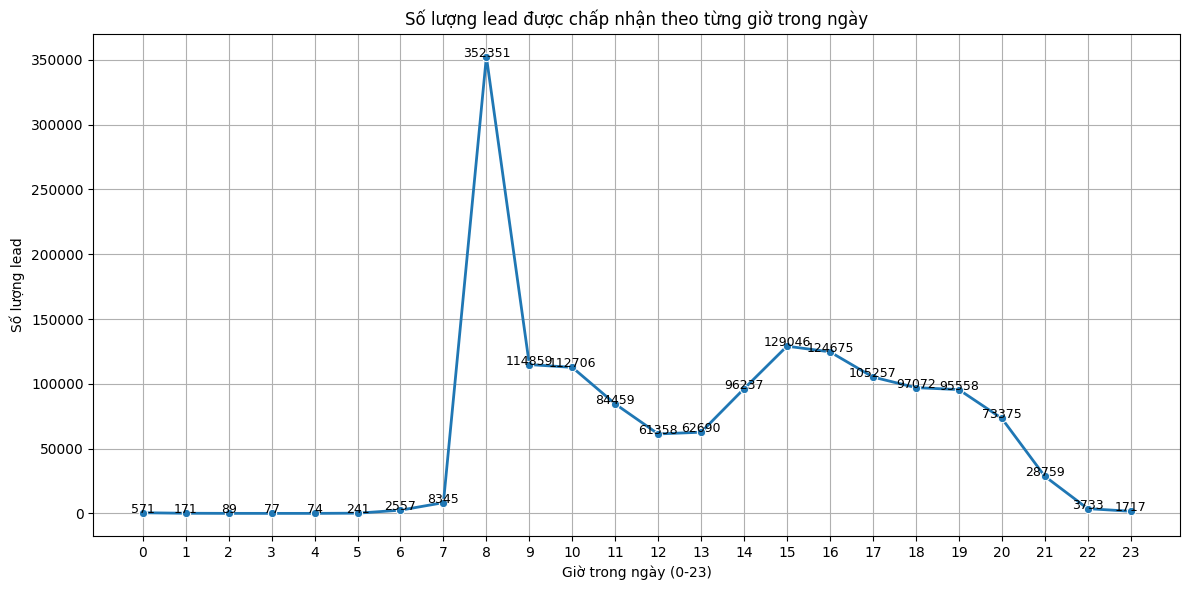

In [21]:
# Đảm bảo datetime đúng
valid_assign_time = leads_df[leads_df['DATE_ACCEPTED'] != '2200-01-01 00:00:00']

# Tạo cột giờ
leads_df['HOUR'] = valid_assign_time['DATE_ACCEPTED'].dt.hour

# Đếm số lượng lead theo từng giờ
leads_by_hour = leads_df.groupby('HOUR').size().reset_index(name='NUM_LEADS')

# Đảm bảo đủ 24 giờ (0–23), kể cả nếu không có dữ liệu
full_hours = pd.DataFrame({'HOUR': np.arange(0, 24)})
leads_by_hour = full_hours.merge(leads_by_hour, on='HOUR', how='left').fillna(0)
leads_by_hour['NUM_LEADS'] = leads_by_hour['NUM_LEADS'].astype(int)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=leads_by_hour, x='HOUR', y='NUM_LEADS', marker='o', linewidth=2)

# Thêm số lên mỗi điểm
for i, row in leads_by_hour.iterrows():
    plt.text(row['HOUR'], row['NUM_LEADS'] + 5, f"{row['NUM_LEADS']}", ha='center', fontsize=9)

plt.title("Số lượng lead được chấp nhận theo từng giờ trong ngày")
plt.xlabel("Giờ trong ngày (0-23)")
plt.ylabel("Số lượng lead")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

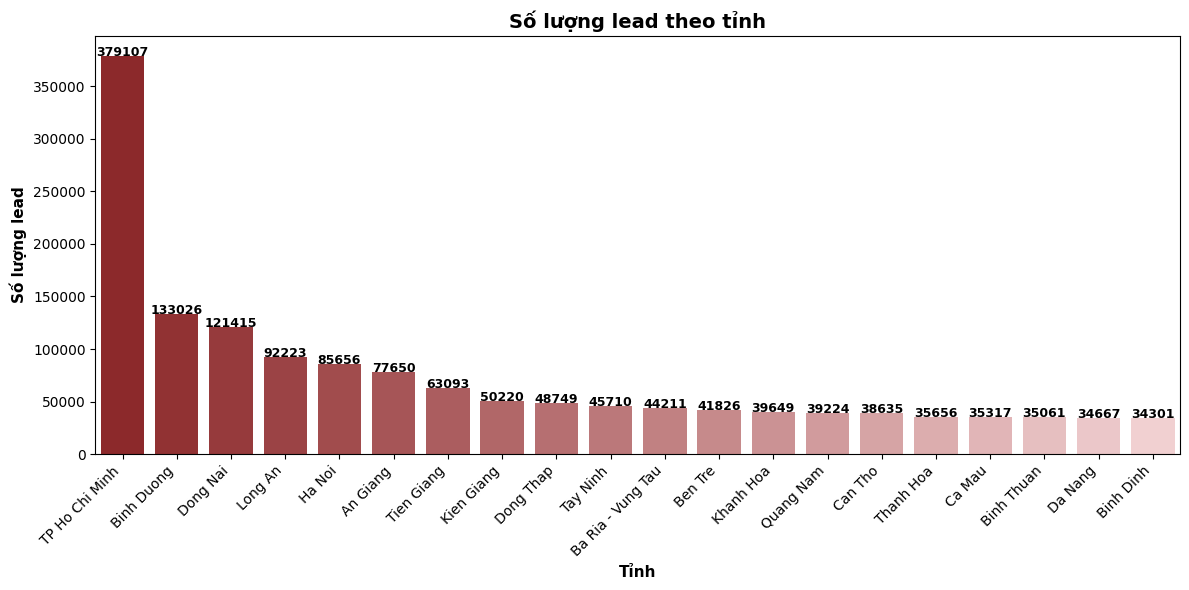

In [22]:
lead_by_province = (
    leads_df['SALESROOM_PROVINCE']
    .dropna()
    .value_counts()
    .head(20)
    .reset_index()
)

# Đổi tên cột cho đúng
lead_by_province.columns = ['PROVINCE', 'NUM_LEADS']

# Tạo bảng màu giống template
custom_colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(lead_by_province))
)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lead_by_province, x='PROVINCE', y='NUM_LEADS', palette=custom_colors)

# Ghi số lên đầu cột
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', 
            ha='center', fontsize=9, fontweight='bold')

# Tiêu đề và nhãn trục với kiểu chữ đậm
plt.title("Số lượng lead theo tỉnh", fontsize=14, fontweight='bold')
plt.xlabel("Tỉnh", fontsize=11, fontweight='bold')
plt.ylabel("Số lượng lead", fontsize=11, fontweight='bold')

# Xoay nhãn trục X
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
valid_sa = leads_df[leads_df['CODE_SA'] != -1]
lead_per_sa = (
    valid_sa
    .groupby('CODE_SA')
    .size()
    .reset_index(name='NUM_LEADS')
)

lead_per_sa

,CODE_SA,NUM_LEADS
0,12791,366
1,12797,231
2,12813,506
3,12892,25
4,12893,124
...,...,...
9605,121783,680
9606,121824,229
9607,121834,246
9608,121887,1


In [24]:
employee_full = employee_df.merge(lead_per_sa, left_on='CODE_EMPLOYEE', right_on='CODE_SA', how='left')
employee_full['NUM_LEADS'] = employee_full['NUM_LEADS'].fillna(0).astype(int)
employee_full

,CODE_EMPLOYEE,HIRING_DATE,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,CODE_SA,NUM_LEADS
0,46911,2021-01-04,2021-10-01,115169,Female,2001-11-28,XNA,270,19,23,Ninh Thuan,False,46911.0,8
1,46945,2021-01-11,2021-07-26,35377,Female,1999-12-23,XNA,196,21,25,Dong Nai,False,46945.0,19
2,47297,2021-02-22,2024-03-13,115717,Female,1999-06-10,JUNIOR,1115,21,26,TP Ho Chi Minh,False,47297.0,187
3,47428,2021-03-01,2021-04-11,2101,Female,1998-10-10,XNA,41,22,26,Binh Thuan,False,NaN,0
4,47435,2021-03-01,2021-11-11,115642,Female,1988-02-18,XNA,255,33,37,TP Ho Chi Minh,False,47435.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,118286,2013-07-24,2021-09-19,120745,Female,1992-11-05,XNA,2979,20,32,Thai Binh,False,118286.0,24
11379,120002,2013-10-14,2022-06-01,17466,Female,1992-05-01,XNA,3152,21,33,Dong Thap,False,120002.0,252
11380,120825,2013-11-27,2021-08-15,23979,Female,1991-03-26,XNA,2818,22,34,TP Ho Chi Minh,False,120825.0,3
11381,121209,2013-12-16,NaN,16010,Male,1988-03-11,JUNIOR,4195,25,37,Dong Thap,False,121209.0,337


In [25]:
def target_feature(row):
    if row['NAME_CREDIT_STATUS'] in ['In Preprocess', 'In Process']:
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] in ['Signed', 'Active', 'Finished', 'Paid off', 'Written off', 'Sold']:
        return 'Signed'
    if row['NAME_CREDIT_STATUS'] == 'Approved':
        if pd.notna(row['SIGN_CONTRACT_TIME']):
            return 'Signed'
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] == 'Rejected':
        return 'Rejected'
    if row['NAME_CREDIT_STATUS'] == 'Cancelled':
        if pd.notna(row['SIGN_CONTRACT_TIME']):
            return 'Signed'
        return 'Rejected'

final_df['SIGNED'] = final_df.apply(target_feature, axis=1)
# final_df = final_df[final_df['SIGNED'] != 'Processing']
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE_x,CNT_CHILDREN_x,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,SIGNED
0,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,26872,Female,1985-03-24,SENIOR,2969,30,40,Phu Tho,False,Signed
1,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,19780,Female,1992-08-03,MASTER,2800,22,32,Khanh Hoa,True,Signed
2,335925533,126826775,XNA,0,2000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,889,Female,1989-11-15,MASTER,2633,28,35,TP Ho Chi Minh,False,Rejected
3,163357328,38084937,Junior school education,0,5000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,34590,Female,1994-06-30,XNA,1473,22,30,Thanh Hoa,False,Signed
4,193688464,37761042,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,1406,Female,1992-07-10,XNA,1624,24,32,Hung Yen,False,Signed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,99124783,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Signed,Cash Loan,...,114569,Female,1988-06-01,WARRIOR,1458,33,37,Long An,False,Signed
900897,342934791,6409762,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Signed,Cash Loan,...,109522,Male,2002-02-23,WARRIOR,1311,19,23,Bac Lieu,False,Signed
900898,342935412,37676700,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Signed,Two-wheelers,...,1428,Male,2000-08-17,JUNIOR,261,24,24,TP Ho Chi Minh,False,Signed
900899,342935765,7514929,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Approved,Cash Loan,...,248,Male,1991-04-22,SENIOR,268,33,34,Long An,False,Processing


In [26]:
approved_per_sa = (
    final_df
    .groupby('CODE_EMPLOYEE')['SIGNED']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

approved_per_sa

SIGNED,CODE_EMPLOYEE,Processing,Rejected,Signed
0,12791,0,48,204
1,12797,0,50,200
2,12813,0,99,300
3,12892,0,36,197
4,12893,0,75,217
...,...,...,...,...
9275,121824,0,129,270
9276,121834,0,78,294
9277,121887,0,46,166
9278,121917,0,52,144


In [27]:
employee_full = employee_full.merge(approved_per_sa, on='CODE_EMPLOYEE', how='left')
employee_full.drop(columns=['CODE_SA'], inplace=True)
employee_full = employee_full.fillna(0)
employee_full

,CODE_EMPLOYEE,HIRING_DATE,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,NUM_LEADS,Processing,Rejected,Signed
0,46911,2021-01-04,2021-10-01,115169,Female,2001-11-28,XNA,270,19,23,Ninh Thuan,False,8,0.0,5.0,10.0
1,46945,2021-01-11,2021-07-26,35377,Female,1999-12-23,XNA,196,21,25,Dong Nai,False,19,0.0,0.0,2.0
2,47297,2021-02-22,2024-03-13,115717,Female,1999-06-10,JUNIOR,1115,21,26,TP Ho Chi Minh,False,187,0.0,13.0,36.0
3,47428,2021-03-01,2021-04-11,2101,Female,1998-10-10,XNA,41,22,26,Binh Thuan,False,0,0.0,0.0,0.0
4,47435,2021-03-01,2021-11-11,115642,Female,1988-02-18,XNA,255,33,37,TP Ho Chi Minh,False,44,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,118286,2013-07-24,2021-09-19,120745,Female,1992-11-05,XNA,2979,20,32,Thai Binh,False,24,0.0,24.0,48.0
11379,120002,2013-10-14,2022-06-01,17466,Female,1992-05-01,XNA,3152,21,33,Dong Thap,False,252,0.0,27.0,68.0
11380,120825,2013-11-27,2021-08-15,23979,Female,1991-03-26,XNA,2818,22,34,TP Ho Chi Minh,False,3,0.0,40.0,189.0
11381,121209,2013-12-16,0,16010,Male,1988-03-11,JUNIOR,4195,25,37,Dong Thap,False,337,0.0,64.0,253.0


In [28]:
employee_full['CONVERSATION_RATE'] = employee_full.apply(
    lambda row: row['Signed'] / row['NUM_LEADS'] if row['NUM_LEADS'] > 0 else 0,
    axis=1
).fillna(0)

employee_full

,CODE_EMPLOYEE,HIRING_DATE,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER,NUM_LEADS,Processing,Rejected,Signed,CONVERSATION_RATE
0,46911,2021-01-04,2021-10-01,115169,Female,2001-11-28,XNA,270,19,23,Ninh Thuan,False,8,0.0,5.0,10.0,1.250000
1,46945,2021-01-11,2021-07-26,35377,Female,1999-12-23,XNA,196,21,25,Dong Nai,False,19,0.0,0.0,2.0,0.105263
2,47297,2021-02-22,2024-03-13,115717,Female,1999-06-10,JUNIOR,1115,21,26,TP Ho Chi Minh,False,187,0.0,13.0,36.0,0.192513
3,47428,2021-03-01,2021-04-11,2101,Female,1998-10-10,XNA,41,22,26,Binh Thuan,False,0,0.0,0.0,0.0,0.000000
4,47435,2021-03-01,2021-11-11,115642,Female,1988-02-18,XNA,255,33,37,TP Ho Chi Minh,False,44,0.0,0.0,3.0,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,118286,2013-07-24,2021-09-19,120745,Female,1992-11-05,XNA,2979,20,32,Thai Binh,False,24,0.0,24.0,48.0,2.000000
11379,120002,2013-10-14,2022-06-01,17466,Female,1992-05-01,XNA,3152,21,33,Dong Thap,False,252,0.0,27.0,68.0,0.269841
11380,120825,2013-11-27,2021-08-15,23979,Female,1991-03-26,XNA,2818,22,34,TP Ho Chi Minh,False,3,0.0,40.0,189.0,63.000000
11381,121209,2013-12-16,0,16010,Male,1988-03-11,JUNIOR,4195,25,37,Dong Thap,False,337,0.0,64.0,253.0,0.750742
